In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download qks1lver/nasdaq-and-nyse-stocks-histories

nasdaq-and-nyse-stocks-histories.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip nasdaq-and-nyse-stocks-histories.zip

Archive:  nasdaq-and-nyse-stocks-histories.zip
replace NASDAQ.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace NYSE.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
! pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [ ]:
a_history = pd.read_csv('full_history/A.csv')

In [ ]:
a_history.head()

,date,volume,open,close,high,low,adjclose
0,2018-11-02,2272100,65.800003,65.930000,66.610001,65.440002,65.930000
1,2018-11-01,1882400,65.070000,65.220001,65.339996,64.580002,65.220001
2,2018-10-31,3820700,64.349998,64.790001,65.980003,64.190002,64.790001
3,2018-10-30,3076700,62.349998,63.639999,63.720001,61.680000,63.639999
4,2018-10-29,2919900,63.650002,62.080002,64.169998,61.130001,62.080002


In [ ]:
a_history.isna().sum()

date        0
volume      0
open        0
close       0
high        0
low         0
adjclose    0
dtype: int64

In [ ]:
a_history.shape

(4771, 7)

In [ ]:
a_history.describe()

,volume,open,close,high,low,adjclose
count,4.771000e+03,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000
mean,3.796878e+06,31.045007,31.058038,31.490768,30.608470,28.987821
std,2.518564e+06,15.308677,15.303916,15.537496,15.077564,15.271229
min,5.327000e+05,7.653791,7.761087,7.961373,7.510730,6.765686
25%,2.299400e+06,20.618741,20.615164,20.994278,20.257511,18.418041
50%,3.289200e+06,26.444921,26.459227,26.773962,26.123034,24.222071
75%,4.609300e+06,39.656651,39.573984,40.089415,39.230000,37.828548
max,6.254630e+07,111.587982,113.733902,115.879829,103.719597,99.146912


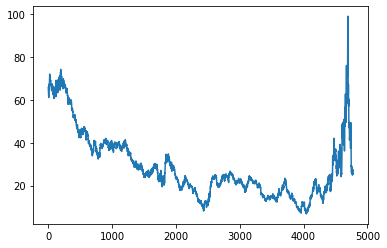

In [ ]:
a_history['adjclose'].plot()

In [ ]:
target = a_history[['adjclose']]
features = a_history.drop(['close','adjclose','date'], axis=1)

In [ ]:
scaler = MinMaxScaler()
t_features = pd.DataFrame(data=scaler.fit_transform(features), columns=features.columns)
t_features.head()

,volume,open,high,low
0,0.028049,0.559452,0.543453,0.602120
1,0.021765,0.552428,0.531685,0.593181
2,0.053021,0.545501,0.537615,0.589127
3,0.041023,0.526258,0.516674,0.563038
4,0.038495,0.538766,0.520843,0.557322


In [ ]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(a_history['date']):
        X_train, X_test = t_features[:len(train_index)], t_features[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target[:len(train_index)].values.ravel(), target[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

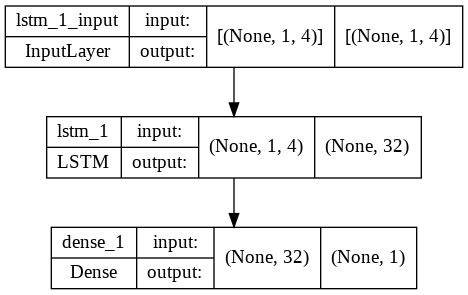

In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32), epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
543/543 [==============================] - 3s 3ms/step - loss: 964.7914
Epoch 2/100
543/543 [==============================] - 1s 3ms/step - loss: 348.0803
Epoch 3/100
543/543 [==============================] - 1s 3ms/step - loss: 66.8650
Epoch 4/100
543/543 [==============================] - 1s 3ms/step - loss: 37.4448
Epoch 5/100
543/543 [==============================] - 1s 2ms/step - loss: 19.7325
Epoch 6/100
543/543 [==============================] - 1s 3ms/step - loss: 12.9799
Epoch 7/100
543/543 [==============================] - 1s 2ms/step - loss: 5.7941
Epoch 8/100
543/543 [==============================] - 1s 2ms/step - loss: 2.5049
Epoch 9/100
543/543 [==============================] - 1s 2ms/step - loss: 1.0281
Epoch 10/100
543/543 [==============================] - 1s 2ms/step - loss: 0.4932
Epoch 11/100
543/543 [==============================] - 1s 3ms/step - loss: 0.3343
Epoch 12/100
543/543 [==============================] - 1s 3ms/step - loss: 0.2875
Epoch

In [ ]:
y_pred= lstm.predict(X_test)

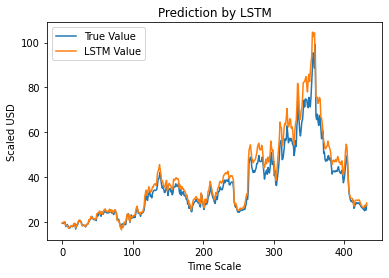

In [ ]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()